# 주성분 분석

# Principal Component Analysis (PCA)

* 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터 셋을 회전시키는 방법
* 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택됨

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

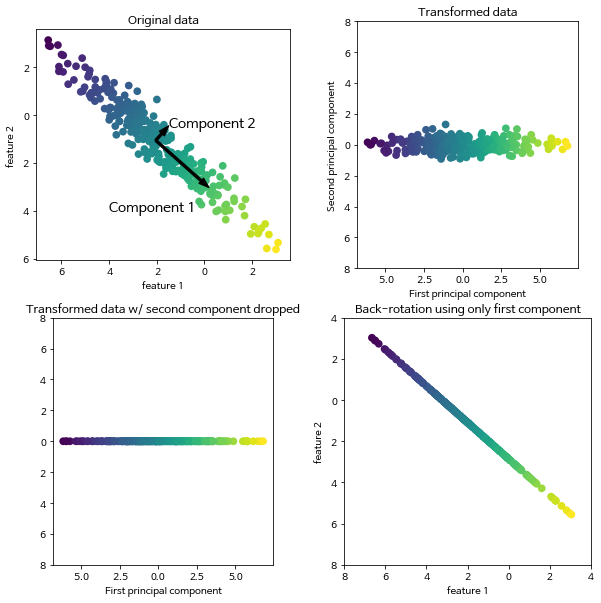

In [2]:
mglearn.plots.plot_pca_illustration()

## 1. PCA 알고리즘

### Step 1.
* 위의 그래프 중 첫 번째 그래프는(왼쪽 위) 원 데이터(original data)의 그래프이며, *"Component 1"* 이라고 쓰여있는, 분산이 가장 큰 방향을 찾는다.
* *Component 1*의 방향(또는 벡터)은 데이터에서 가장 많은 정보를 담고 있는 방향이며, 특성들의 상관관계가 가장 큰 방향이다.

### Step 2.
* 그 다음, 첫 번째 방향, 즉 *Component 1*과 직각인 방향 중에서 가장 많은 정보를 담고있는(두 번째로 분산이 큰) 방향을 찾는다.
* **Step1, 2**의 과정을 거쳐 찾은 방향을 데이터의 주된 분산의 방향이라고 해서 **주성분(Principal Component)**라고 한다.

## 2. sklearn.decomposition.[PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

*class* `sklearn.decomposition.PCA`(*n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None*)

### parameters
* **n_components**: int, float, None or string
    * 선택할 주성분(PC) 개수를 설정
    * default는 None이며, 모든 성분(component)가 선택된다(남는다).
    * 자세한건 링크 참고

* **svd_solver**: string{'auto', 'full', 'arpack', 'randomized'}
    * SVD(Singular Value Decomposition) 특이값 분해 방법을 설정

### Attributes
* **components_** : array, shape (n_components, n_features)
    * eigenvector를 출력해줌
    * 각 행은 주성분 하나씩을 나타내며 중요도 순으로 정려되어 있다. 열은 original 데이터의 특성(feature)을 나타낸다.
    * Principal axes in feature space, representing the directions of maximum variance in the data. 

* **explained\_variance_**: array, shape (n_components,)
    * eigenvalue를 출력해줌
    * The amount of variance explained by each of the selected components.
    Equal to n_components largest eigenvalues of the covariance matrix of X

* **explained\_variance\_ratio\_**: array, shape (n_components,)
    * 주성분(PC)의 설명력을 출력해줌
    * Percentage of variance explained by each of the selected components.

* **singular\_values\_**: array, shape (n_components,)
    * The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the `n_components` variables in the lower-dimensional space.

### PCA examples

In [8]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
print('설명력: ',pca.explained_variance_ratio_)  
print('특이값: ',pca.singular_values_)
print('고유값: ', pca.explained_variance_)
print('고유 벡터:\n',pca.components_)

from numpy import linalg as LA

ev, eig = LA.eig(np.cov(X.T))
print('\n===Numpy로 구한 고유값과 고유벡터===')
print('고유값: ',ev)
print('고유벡터:\n',eig)

설명력:  [ 0.99244289  0.00755711]
특이값:  [ 6.30061232  0.54980396]
고유값:  [ 7.93954312  0.06045688]
고유 벡터:
 [[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]

===Numpy로 구한 고유값과 고유벡터===
고유값:  [ 7.93954312  0.06045688]
고유벡터:
 [[ 0.83849224 -0.54491354]
 [ 0.54491354  0.83849224]]


## 2. PCA를 적용해 유방암 데이터셋 시각화하기
* PCA가 가장 많이 사용되는 분야는 고차원 데이터셋의 시각화이다.
* 데이터의 차원(특성)이 많아지면 데이터를 시각화 하는것은 어려운일이다.
* PCA를 이용하면 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지 파악할 수 있다.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# PCA를 적용하기 전에 데이터를 스케일링 해준다.
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [38]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 선택
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델생성
# pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환
X_pca = pca.fit_transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


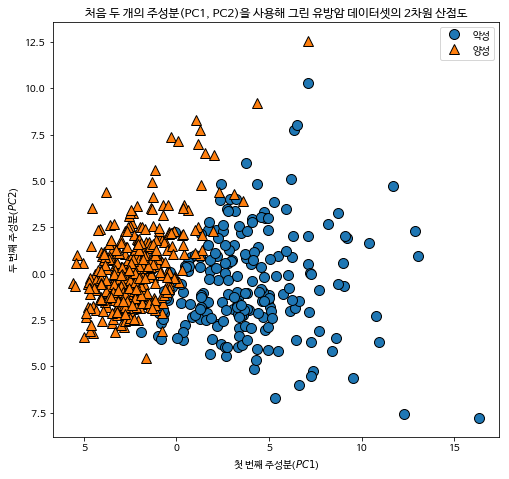

In [41]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분($PC1$)")
plt.ylabel("두 번째 주성분($PC2$)")
plt.title('처음 두 개의 주성분(PC1, PC2)을 사용해 그린 유방암 데이터셋의 2차원 산점도')

* PCA의 **단점**은 위의 그래프처럼 두 축, 즉 주성분 PC1과 PC2를 해석하기가 어렵다.
* 주성분은 원래의 데이터(Original data)에 있는 어떤 방향에 대응하는 여러 특성(feature)가 조합된 형태이다.

In [42]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 30)


* `pca.components_` 의 각 **행**은 *주성분* 하나씩을 나타내며 중요도 순으로 정려되어 있다. **열**은 original 데이터의 *특성(feature)*을 나타낸다. 

In [43]:
print("PCA 주성분: {}".format(pca.components_))

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


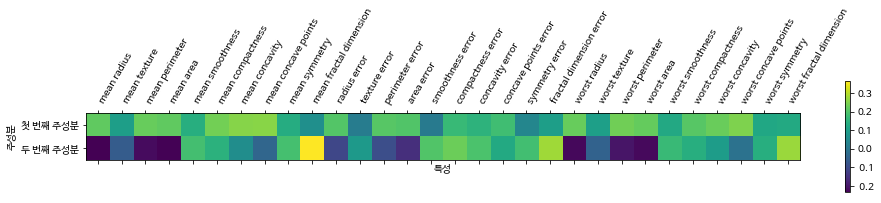

In [46]:
# 유방암 데이터셋에서 찾은 처음 두 개의 주성분 히트맵
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

* 위의 그림에서 첫번째 주성분(PC1)의 모든 feature의 부호(+/-)가 같다. 즉, 모든 *특성 사이에 공통의 상호관계가 있다는 뜻*이다.(한 특성의 값이 커지면 다른 특성들의 값 또한 커짐)
* 두번째 주성분(PC2)은 부호가 섞여있으므로 축이 가지는 의미를 설명하기 쉽지 않다.

## 3. 고유얼굴(eigenface) 특성 추출